In [15]:
import requests 
import json 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import plotly.express as px

resp = requests.get("http://api-1.advative.io/mikkel-post/freq-reach-stats/specsavers")
resp = resp.json()

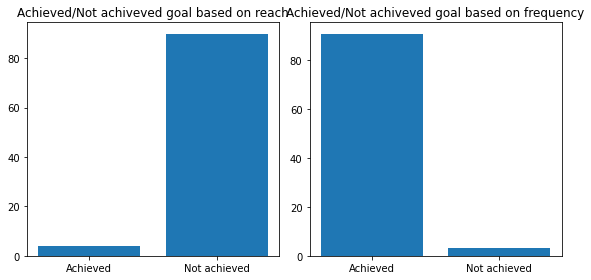

In [60]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.title("Achieved/Not achiveved goal based on reach")
plt.bar(["Achieved", "Not achieved"], [len(goalAr), len(goalNr)])
plt.subplot(1,2,2)

plt.title("Achieved/Not achiveved goal based on frequency")
plt.bar(["Achieved", "Not achieved"], [len(goalAf), len(goalNf)])
plt.tight_layout()
plt.show()

In [59]:
goalAr = []
goalNr = []
goalAf = []
goalNf = []

attribute = "target_size"
for item in resp: 
    if float(item['goal_achieved']['reach'].split("%")[0]) < 100:
        goalNr.append(float(item[attribute]))
    else:
        goalAr.append(float(item[attribute]))

    if float(item['goal_achieved']['frequency'].split("%")[0]) < 100:
        goalNf.append(float(item[attribute]))
    else:
        goalAf.append(float(item[attribute]))


df =pd.DataFrame(dict(
    series=np.concatenate((["Not achieved"]*len(goalNr), ["Achieved"]*len(goalAr))), 
    data  =np.concatenate((goalNr,goalAr))
))

px.histogram(df, x="data", color="series", barmode="overlay", nbins = 30)

In [1]:
from datetime import datetime
import re, os
from pathlib import Path
from typing import Tuple, Set

# Check for YYYY-MM-DD
_re_blog_date = re.compile(r'([12]\d{3}-(0[1-9]|1[0-2])-(0[1-9]|[12]\d|3[01])-)')
# Check for leading dashses or numbers
_re_numdash = re.compile(r'(^[-\d]+)')

def rename_for_jekyll(nb_path: Path, warnings: Set[Tuple[str, str]]=None) -> str:
    """
    Return a Path's filename string appended with its modified time in YYYY-MM-DD format.
    """
    assert nb_path.exists(), f'{nb_path} could not be found.'

    # Checks if filename is compliant with Jekyll blog posts
    if _re_blog_date.match(nb_path.name): return nb_path.with_suffix('.md').name.replace(' ', '-')
    
    else:
        clean_name = _re_numdash.sub('', nb_path.with_suffix('.md').name).replace(' ', '-')

        # Gets the file's last modified time and and append YYYY-MM-DD- to the beginning of the filename
        mdate = os.path.getmtime(nb_path) - 86400 # subtract one day b/c dates in the future break Jekyll
        dtnm = datetime.fromtimestamp(mdate).strftime("%Y-%m-%d-") + clean_name
        assert _re_blog_date.match(dtnm), f'{dtnm} is not a valid name, filename must be pre-pended with YYYY-MM-DD-'
        # push this into a set b/c _nb2htmlfname gets called multiple times per conversion
        if warnings: warnings.add((nb_path, dtnm))
        return dtnm

In [2]:
"""Converts Jupyter Notebooks to Jekyll compliant blog posts"""
from datetime import datetime
import re, os, logging
from nbdev import export2html
from nbdev.export2html import Config, Path, _to_html, _re_block_notes
# from fast_template import rename_for_jekyll

warnings = set()
    
# Modify the naming process such that destination files get named properly for Jekyll _posts
def _nb2htmlfname(nb_path, dest=None): 
    fname = rename_for_jekyll(nb_path, warnings=warnings)
    if dest is None: dest = Config().doc_path
    return Path(dest)/fname

# TODO: Open a GitHub Issue in addition to printing warnings
for original, new in warnings:
    print(f'{original} has been renamed to {new} to be complaint with Jekyll naming conventions.\n')
    
## apply monkey patches
export2html._nb2htmlfname = _nb2htmlfname
export2html.notebook2html(fname='C:\Users\Mikkel\Desktop\Project\GameOfThrones_Network\notebooks_final\08_explainer_final.ipynb', dest='_posts/', template_file='/fastpages/fastpages.tpl', execute=False)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_37008/34834179.py, line 22)